In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
# variables
path_excel = r'data.xlsx'
sheetname = r'fsm_E&T'

hatches = ['///', '...', '+++', 'oo']

plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = 14

dpi = 700
file_path = r'images/FigureS-5 fsm_e&t_cost.pdf'

In [3]:
# x軸の目盛りを設定する
def thousand_formatter(x, pos):
    return '{:,.0f}'.format(x / 1000)

In [4]:
def createPiechart(ax, title, group_col, value_col):
    wedges, labels, _ = ax.pie(
        df[value_col], 
        colors='w',
        autopct='%.0f%%', 
        pctdistance=1.2, 
        startangle=90, 
        counterclock=False,
        wedgeprops={'linewidth': 1, 'edgecolor':"k"},
        textprops={'fontsize': 16})

    for i, wedge in enumerate(wedges):
        wedge.set_hatch(hatches[i % len(hatches)])

    ax.set_title(title, loc='center', x=0.5, y=1.0, fontsize=18, pad=20)
#     ax.legend(wedges, df[group_col], title=group_col, loc='lower center', bbox_to_anchor=(0.5, -0.2), prop={"size":12})

In [5]:
def createComparedBarchart(ax, sheet_name, x_col_1, x_col_2, y_col, title, x_label):
    df = pd.read_excel(path_excel, sheet_name=sheet_name)

    width = 0.35

    ax.barh(df[y_col].index, df[x_col_1], height=width, label=x_col_1, color='#d3d3d3', edgecolor='k', hatch=None)
    ax.barh(df[y_col].index + width, df[x_col_2], height=width, label=x_col_2, color='w', edgecolor='k', hatch='//')

    ax.invert_yaxis()
    ax.set_yticks(df[y_col].index + width / 2)
    ax.set_yticklabels(df[y_col], fontsize=16)

    ax.xaxis.set_major_formatter(FuncFormatter(thousand_formatter))
    ax.xaxis.grid(True)

    ax.set_xlabel(x_label, fontsize=16)
    ax.set_title(title, pad=20, fontsize=18)

#     for i, v in enumerate(df[x_col_1]):
#         label = '{:,.2f}'.format(v / 1000)
#         if v == 0:
#             label = 0
#         elif label.endswith('.00'):
#             label = label[:-3]
#         elif label.endswith('0'):
#             label = label[:-1]
#         ax.text(v, i, label, color='k', va='center', fontsize=14)

#     for i, v in enumerate(df[x_col_2]):
#         label = '{:,.2f}'.format(v / 1000)
#         if v == 0:
#             label = 0
#         elif label.endswith('.00'):
#             label = label[:-3]
#         elif label.endswith('0'):
#             label = label[:-1]
#         if (df[y_col][i] == 'Consumables'):
#             ax.text(v, i + width * 2.5, label, color='k', va='center', fontsize=14, ha='right')
#         else:
#             ax.text(v, i + width, label, color='k', va='center', fontsize=14)

    ax.legend(loc='lower right', prop={"size":16})

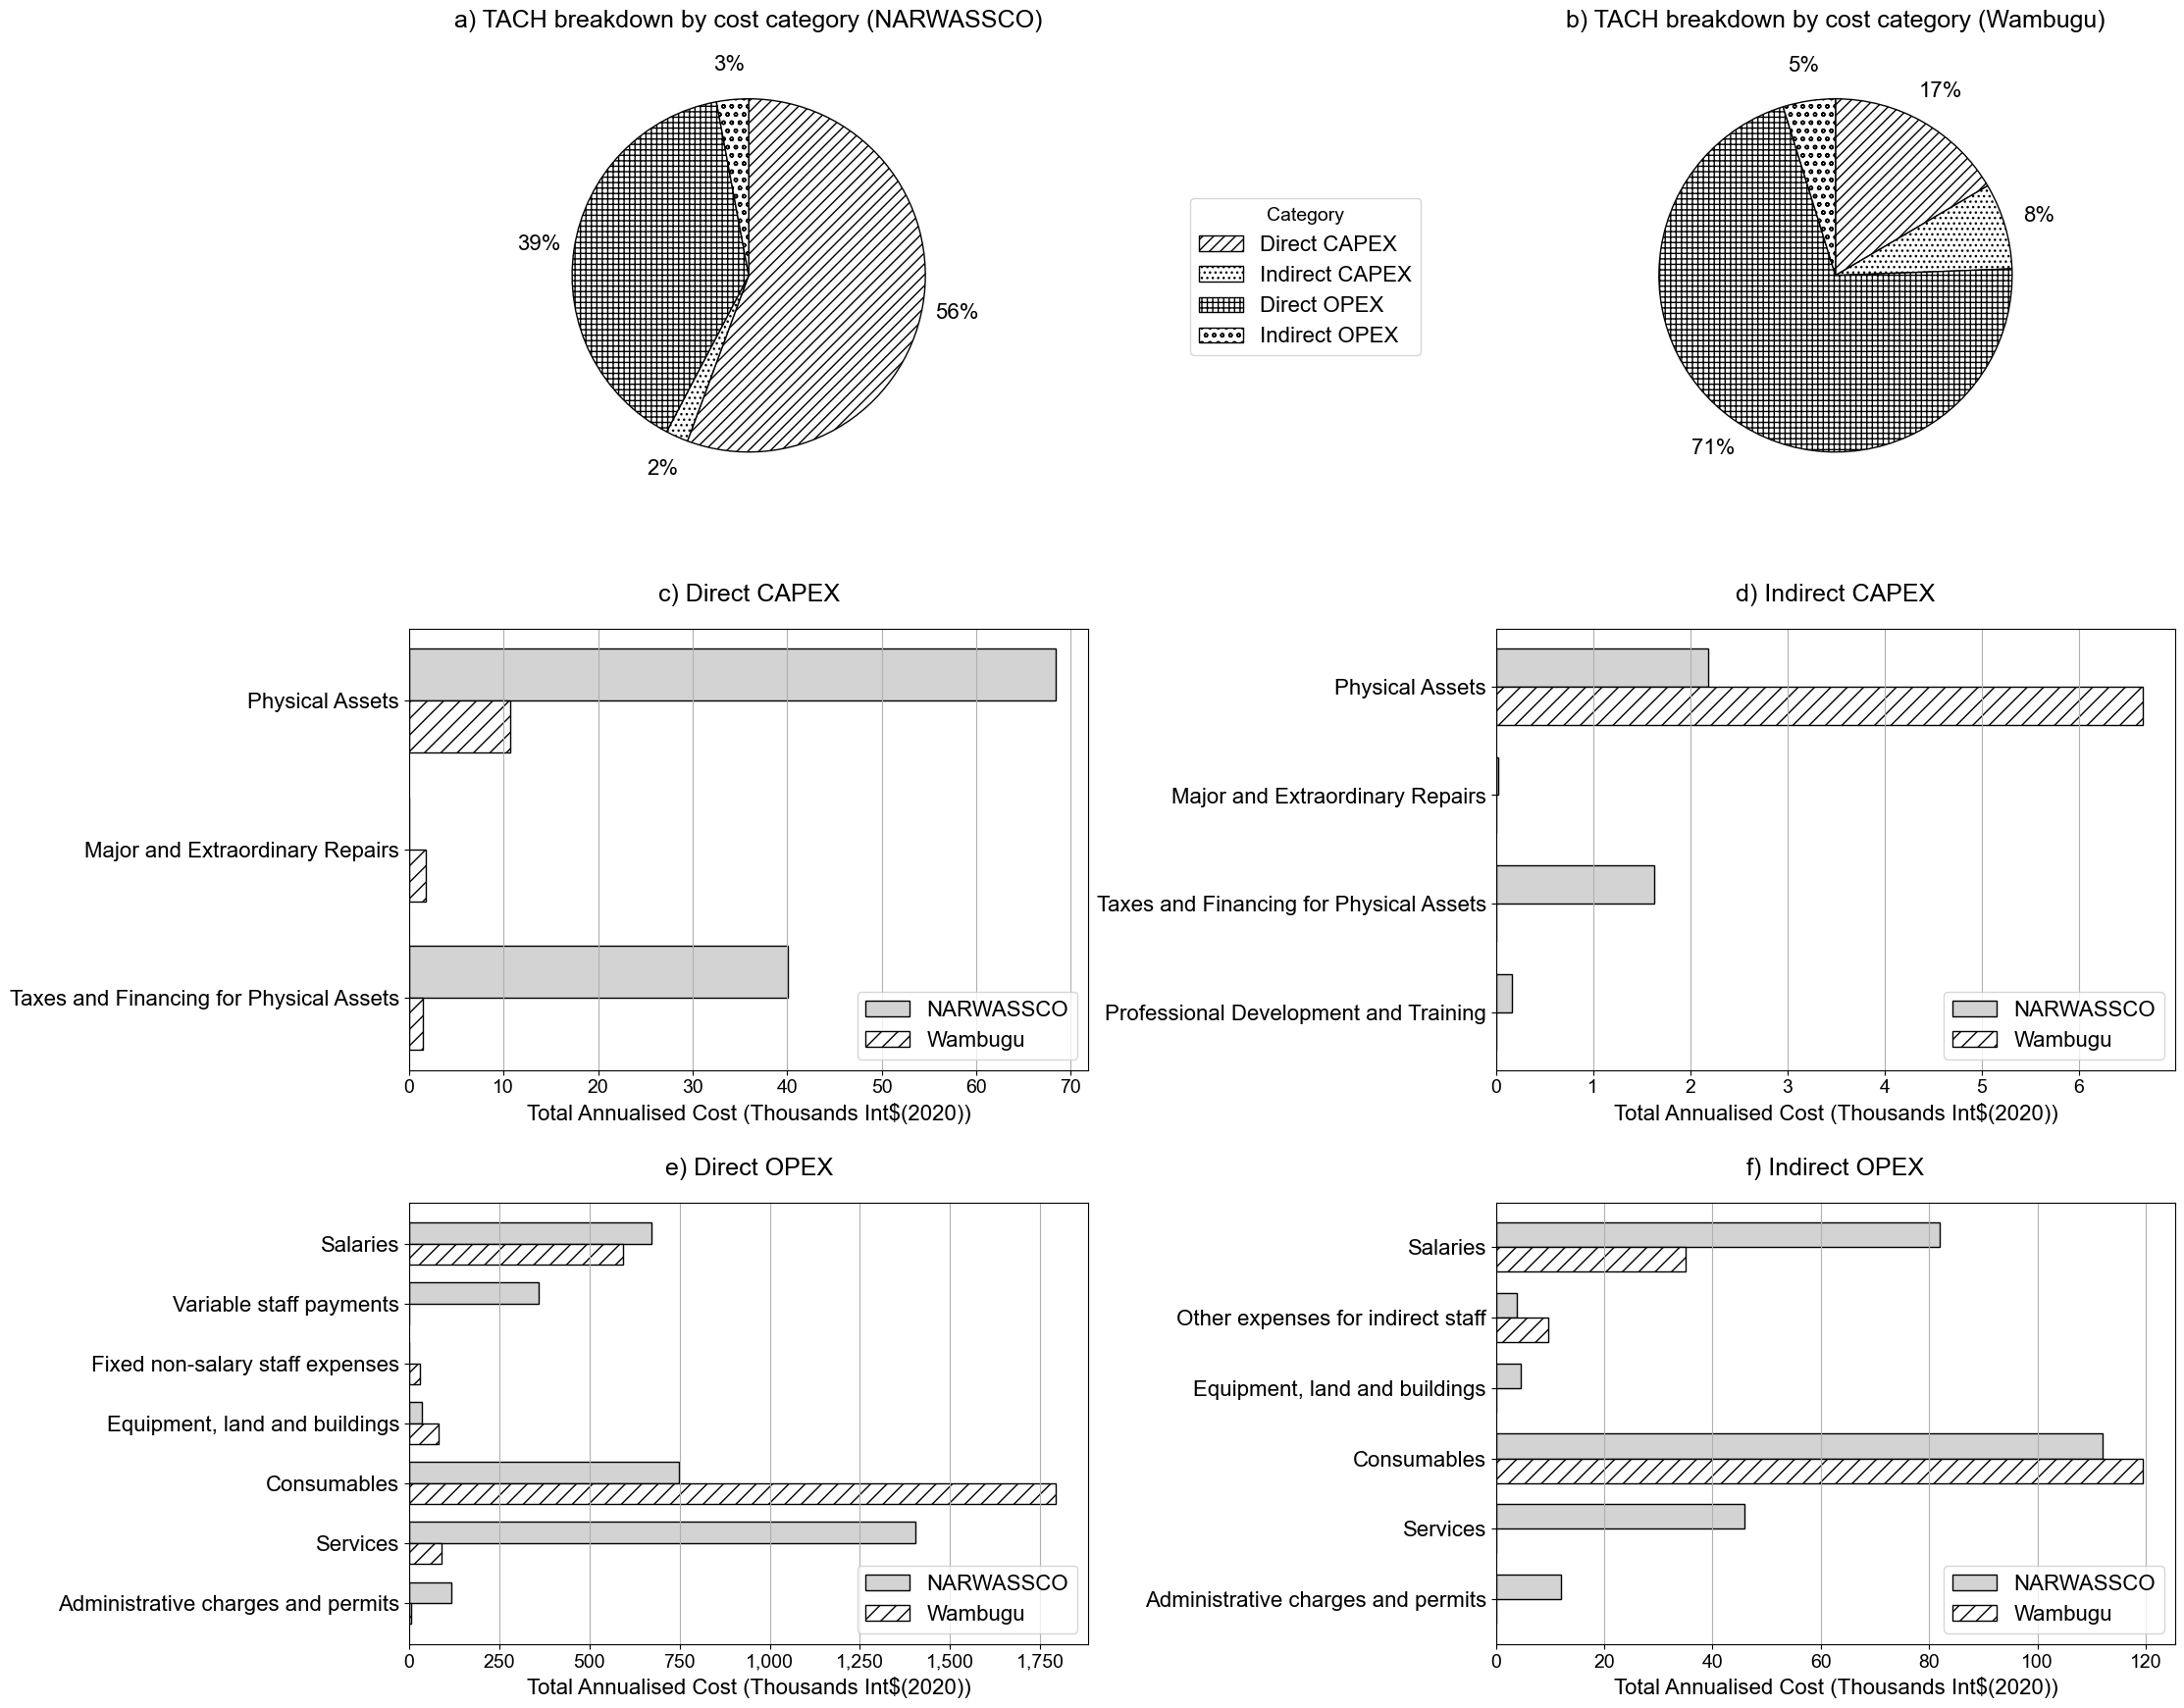

In [6]:
df = pd.read_excel(path_excel, sheet_name=sheetname)

fig = plt.figure(figsize=(20, 18))

ax1 = fig.add_subplot(3, 2, 1)

group_col='Category'

createPiechart(
    ax1,
    title='a) TACH breakdown by cost category (NARWASSCO)',
    group_col=group_col,
    value_col='NARWASSCO'
)

ax2 = fig.add_subplot(3, 2, 2)

createPiechart(
    ax2,
    title='b) TACH breakdown by cost category (Wambugu)',
    group_col=group_col,
    value_col='Wambugu'
)

plt.legend(df[group_col], title=group_col, loc='upper center', bbox_to_anchor=(-0.7, 0.7), prop={"size":16})

ax3 = fig.add_subplot(3, 2, 3)

createComparedBarchart(
    ax3, 
    sheet_name='fsm_E&T_directcapex', 
    x_col_1='NARWASSCO', 
    x_col_2='Wambugu', 
    y_col='Category', 
    title='c) Direct CAPEX', 
    x_label='Total Annualised Cost (Thousands Int$(2020))'
)

ax4 = fig.add_subplot(3, 2, 4)

createComparedBarchart(
    ax4, 
    sheet_name='fsm_E&T_indirectcapex', 
    x_col_1='NARWASSCO', 
    x_col_2='Wambugu', 
    y_col='Category', 
    title='d) Indirect CAPEX', 
    x_label='Total Annualised Cost (Thousands Int$(2020))'
)

ax5 = fig.add_subplot(3, 2, 5)

createComparedBarchart(
    ax5, 
    sheet_name='fsm_E&T_directopex', 
    x_col_1='NARWASSCO', 
    x_col_2='Wambugu', 
    y_col='Category', 
    title='e) Direct OPEX', 
    x_label='Total Annualised Cost (Thousands Int$(2020))'
)

ax6 = fig.add_subplot(3, 2, 6)

createComparedBarchart(
    ax6, 
    sheet_name='fsm_E&T_indirectopex', 
    x_col_1='NARWASSCO', 
    x_col_2='Wambugu', 
    y_col='Category', 
    title='f) Indirect OPEX', 
    x_label='Total Annualised Cost (Thousands Int$(2020))'
)

plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, wspace=0.6, hspace=0.3)

plt.savefig(file_path, format="pdf", dpi=dpi, transparent=True, bbox_inches='tight')
plt.savefig(f"{file_path}.png", format="png", dpi=dpi, transparent=True, bbox_inches='tight')
plt.show()